In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
# comments=pd.read_csv('UScomments.csv.csv') #throws an error as error_bad_lines=True make it false

In [25]:
 comments=pd.read_csv('UScomments.csv',error_bad_lines=False)

C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3251: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
comments.head()


video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [7]:
comments.dropna(inplace=True)

In [8]:
comments.shape

(691375, 4)

In [9]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [10]:
from textblob import TextBlob as tb

In [11]:
tb('MY FAN . attendance').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [12]:
tb('MY FAN . attendance').sentiment.polarity  #to access the polarity

0.0

In [13]:
polarity=[]
for i in comments['comment_text']:
    polarity.append(tb(i).sentiment.polarity)

In [13]:
polarity[0:20]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8,
 -0.13571428571428573,
 0.0,
 0.2,
 -0.023333333333333352,
 0.5,
 0.0,
 0.8,
 -0.2916666666666667,
 0.0,
 0.25,
 -0.8]

In [14]:
comments['polarity']=polarity

In [15]:
comments.head(10)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8  XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9  XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   

  replies  polarity  
0       0  0.000000  
1       0  0.000000  
2       0  0.000000  
3       0  0.000000  
4       0  0.000000  
5       0  0.000000  
6       0  0.000000  
7       0  0.000000  
8       0  0.800000  
9       0 -0.135714

***Lets Perform EDA for Positive Sent***

In [16]:
comments['polarity']==1

0         False
1         False
2         False
3         False
4         False
          ...  
691395    False
691396    False
691397    False
691398    False
691399    False
Name: polarity, Length: 691375, dtype: bool

In [27]:
comments['video_id'].unique().shape
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [35]:
# cdf1=comments.groupby('video_id')['video_id'].count()

In [44]:
# cdf1=cdf1.to_frame()

(array([280., 303., 363., 310., 417.,  12., 378., 146.,  48.,   9.]),
 array([  1. ,  80.9, 160.8, 240.7, 320.6, 400.5, 480.4, 560.3, 640.2,
        720.1, 800. ]),
 <BarContainer object of 10 artists>)

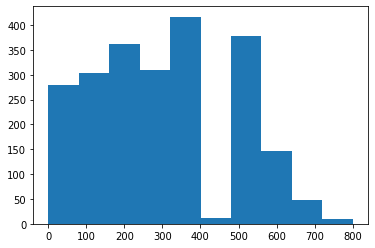

In [17]:
comments_positive=comments[comments['polarity']==1]

In [18]:
comments_positive.shape

(19390, 5)

In [19]:
comments_positive.head(20)

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   
325  sjlHnJvXdQs                   This is awesome. 1:20 XDDDDDDDDD     0   
416  cMKX2tE5Luk                                 BEST MOVIE EVER!!!     0   
433  cMKX2tE5Luk  Power is the disease.  Care is the cure.  Keep...     0   
447  cMKX2tE5Luk       The greatest movie about the greatest movie.     0   
469  cMKX2tE5Luk         It's Harry guys he's Spiderman best friend     0   
482  cMKX2tE5Luk                                  Best remake ever!     1   
697  _HTXMhKWqnA                                      Great review!     0   
709  _ANP3HR1jsM                                       awesome vlog     0   
782  _ANP3HR1jsM  Subscribe to me if Roman Atwood is the best yo...     0   
789  _ANP3HR1jsM  I was attacked by a police dog once, \n\n\n\n\...     1   
821  zgLtEob6X-Q         The best part of the movie was the credits     0   
834  zgLtEob6X-Q  DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!...     0   
849  zgLtEob6X-Q  i downloaded and saw The Mummy 2017  in the be...     0   
879  zgLtEob6X-Q  Please say uncle touchy. Prease honest trailer...     0   
899  Ayb_2qbZHm4                           Welcome to Wage Slavery!    16   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0  
325       0       1.0  
416       0       1.0  
433       0       1.0  
447       0       1.0  
469       0       1.0  
482       0       1.0  
697       0       1.0  
709       0       1.0  
782       0       1.0  
789       0       1.0  
821       0       1.0  
834       0       1.0  
849       0       1.0  
879       0       1.0  
899       1       1.0

In [20]:
# !pip install wordcloud

In [21]:
from wordcloud import WordCloud,STOPWORDS

In [22]:
comments_positive['comment_text']

64                                          yu are the best
156       Power is the disease.  Care is the cure.  Keep...
227       YAS Can't wait to get it! I just need to sell ...
307                                       This is priceless
319                                     Summed up perfectly
                                ...                        
691373                               Perfect. Every version
691383                                    Me encantaaaaa <3
691388                                     Best song ever 🤘
691389                                excellent performance
691393                                                   <3
Name: comment_text, Length: 19390, dtype: object

In [23]:
stopwords=set(STOPWORDS)

In [24]:
total_comments=' '.join(comments_positive['comment_text'])

In [25]:
total_comments[0:100]

'yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as bes'

(-0.5, 399.5, 199.5, -0.5)

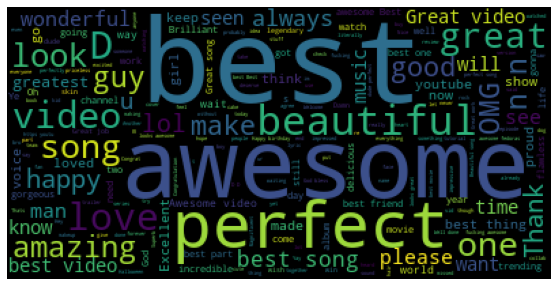

In [26]:
wc=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wc)
plt.axis('off')

**Lets Perform EDA for Negative Sent**

In [27]:
comments['polarity']==-1

0         False
1         False
2         False
3         False
4         False
          ...  
691395    False
691396    False
691397    False
691398    False
691399    False
Name: polarity, Length: 691375, dtype: bool

In [28]:
comments_negative=comments[comments['polarity']==-1]

In [29]:
comments_negative.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [30]:
comments_negative.shape

(3508, 5)

In [31]:
total_comments2=' '.join(comments_negative['comment_text'])

In [32]:
total_comments2[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

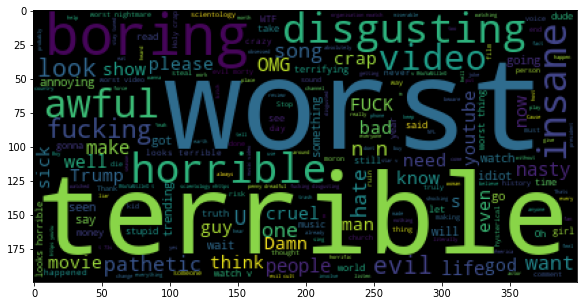

In [33]:
wc2=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wc2)


(-0.5, 399.5, 199.5, -0.5)

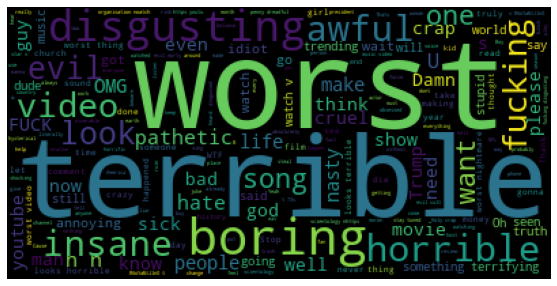

In [34]:
wc2=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wc2)

plt.axis('off')

# Emoji's Analysis

In [35]:
import emoji

In [36]:
comments.head(8)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0  
5       0       0.0  
6       0       0.0  
7       0       0.0

In [41]:
emoji_list=[]
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(char)

In [43]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [44]:
from collections import Counter

In [45]:
Counter(emoji_list)

Counter({'‼': 211,
         '😉': 998,
         '😭': 8398,
         '👍': 5476,
         '🏻': 3438,
         '❤': 31119,
         '😍': 33453,
         '💋': 968,
         '💙': 2831,
         '👈': 126,
         '😂': 36987,
         '🔥': 8694,
         '👻': 268,
         '💎': 316,
         '😆': 1149,
         '😁': 2220,
         '😒': 629,
         '👏': 5719,
         '😊': 3596,
         '👌': 3112,
         '🤔': 1592,
         '💔': 617,
         '👎': 673,
         '🍎': 49,
         '😤': 378,
         '😢': 2672,
         '👫': 33,
         '💘': 702,
         '😻': 1409,
         '💖': 5359,
         '🌟': 549,
         '😮': 1232,
         '👇': 151,
         '😳': 398,
         '😠': 599,
         '😴': 187,
         '😝': 413,
         '™': 46,
         '☺': 1180,
         '😔': 545,
         '😩': 1472,
         '😡': 478,
         '🙏': 1818,
         '😄': 1496,
         '😬': 3381,
         '☹': 173,
         '🤷': 334,
         '🤣': 2279,
         '😃': 1235,
         '🏽': 1593,
         '🍏': 56,
      

In [47]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [48]:
Counter(emoji_list).most_common(10)[0][0]

'😂'

In [49]:
Counter(emoji_list).most_common(10)[0][1]

36987

In [50]:
emojis=[Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [51]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [52]:
freq=[Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [54]:
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pyla

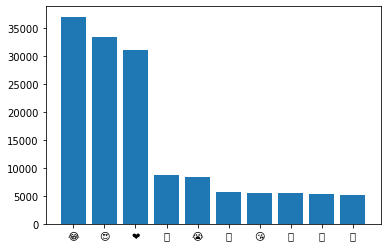

In [56]:
plt.bar(emojis,freq)
plt.show

In [58]:
from plotly import graph_objs as go

In [59]:
from plotly.offline import iplot

In [61]:
trace=go.Bar(x=emojis,y=freq)

In [63]:
iplot([trace])

# Which category has max like's on YouTube

In [65]:
df=pd.read_csv('USvideos.csv',error_bad_lines=False)

C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3251: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.



b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [66]:
df.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [68]:
df.shape

(7992, 11)

In [71]:
df['category_id'].unique()

array([24, 28, 22, 23,  1, 26, 10, 25, 17, 27,  2, 20, 15, 29, 19, 43],
      dtype=int64)

In [76]:
cat=pd.read_csv('category_file.txt',sep=':')  #read text file and converting into csv

In [80]:
cat.reset_index(inplace=True)

In [83]:
cat[0:10]

index Category_id      Category_name
0      1               Film & Animation
1      2               Autos & Vehicles
2     10                          Music
3     15                 Pets & Animals
4     17                         Sports
5     18                   Short Movies
6     19                Travel & Events
7     20                         Gaming
8     21                  Videoblogging
9     22                 People & Blogs

In [84]:
cat.columns=['category_id','category_name']

In [85]:
cat

category_id           category_name
0             1        Film & Animation
1             2        Autos & Vehicles
2            10                   Music
3            15          Pets & Animals
4            17                  Sports
5            18            Short Movies
6            19         Travel & Events
7            20                  Gaming
8            21           Videoblogging
9            22          People & Blogs
10           23                  Comedy
11           24           Entertainment
12           25         News & Politics
13           26           Howto & Style
14           27               Education
15           28    Science & Technology
16           29   Nonprofits & Activism
17           30                  Movies
18           31         Anime/Animation
19           32        Action/Adventure
20           33                Classics
21           34                  Comedy
22           35             Documentary
23           36                   Drama
24           37                  Family
25           38                 Foreign
26           39                  Horror
27           40          Sci-Fi/Fantasy
28           41                Thriller
29           42                  Shorts
30           43                   Shows
31           44    Trailers

In [88]:
cat.set_index('category_id',inplace=True)

In [89]:
cat

category_name
category_id                        
1                  Film & Animation
2                  Autos & Vehicles
10                            Music
15                   Pets & Animals
17                           Sports
18                     Short Movies
19                  Travel & Events
20                           Gaming
21                    Videoblogging
22                   People & Blogs
23                           Comedy
24                    Entertainment
25                  News & Politics
26                    Howto & Style
27                        Education
28             Science & Technology
29            Nonprofits & Activism
30                           Movies
31                  Anime/Animation
32                 Action/Adventure
33                         Classics
34                           Comedy
35                      Documentary
36                            Drama
37                           Family
38                          Foreign
39                           Horror
40                   Sci-Fi/Fantasy
41                         Thriller
42                           Shorts
43                            Shows
44             Trailers

In [99]:
dct=cat.to_dict()  #converting into dictionary

In [100]:
dct['category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [105]:
df['category_names']=df['category_id'].map(dct['category_name'])

In [106]:
df.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date',
       'category_names'],
      dtype='object')

In [107]:
df.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date         category_names  
0  13.09          Entertainment  
1  13.09   Science & Technology  
2  13.09         People & Blogs  
3  13.09   Science & Technology  
4  13.09                 Comedy

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Entertainment'),
  Text(1, 0, ' Science & Technology'),
  Text(2, 0, ' People & Blogs'),
  Text(3, 0, ' Comedy'),
  Text(4, 0, ' Film & Animation'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Music'),
  Text(7, 0, ' News & Politics'),
  Text(8, 0, ' Sports'),
  Text(9, 0, ' Education'),
  Text(10, 0, ' Autos & Vehicles'),
  Text(11, 0, ' Gaming'),
  Text(12, 0, ' Pets & Animals'),
  Text(13, 0, ' Nonprofits & Activism'),
  Text(14, 0, ' Travel & Events'),
  Text(15, 0, ' Shows')])

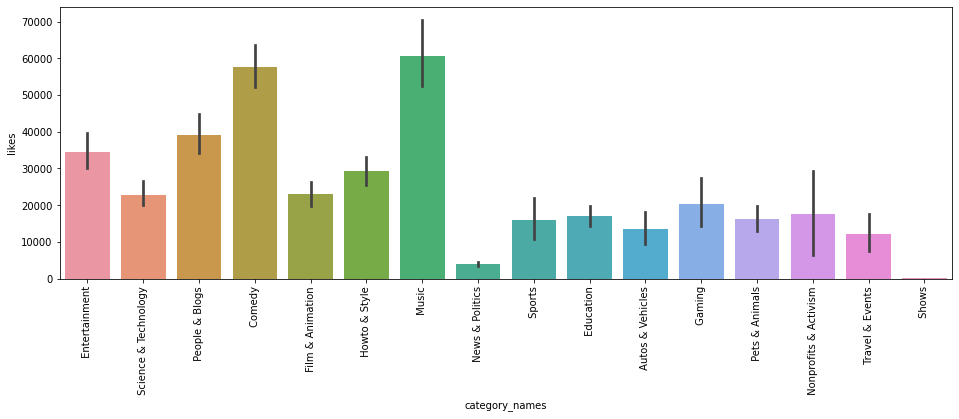

In [119]:
plt.figure(figsize=(16,5))

sns.barplot(data=df,x='category_names',y='likes')
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Entertainment'),
  Text(1, 0, ' Science & Technology'),
  Text(2, 0, ' People & Blogs'),
  Text(3, 0, ' Comedy'),
  Text(4, 0, ' Film & Animation'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Music'),
  Text(7, 0, ' News & Politics'),
  Text(8, 0, ' Sports'),
  Text(9, 0, ' Education'),
  Text(10, 0, ' Autos & Vehicles'),
  Text(11, 0, ' Gaming'),
  Text(12, 0, ' Pets & Animals'),
  Text(13, 0, ' Nonprofits & Activism'),
  Text(14, 0, ' Travel & Events'),
  Text(15, 0, ' Shows')])

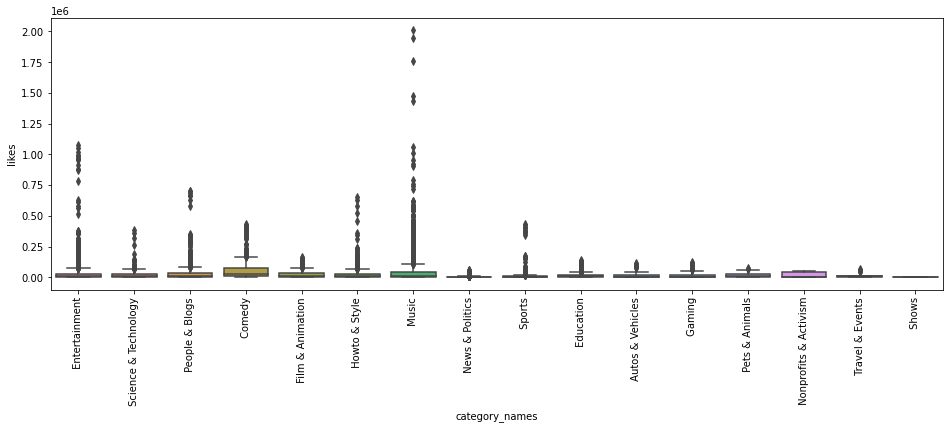

In [120]:
plt.figure(figsize=(16,5))

sns.boxplot(data=df,x='category_names',y='likes')
plt.xticks(rotation='vertical')

# Whether audience is engaged or not

In [121]:
df.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date',
       'category_names'],
      dtype='object')

In [128]:
df['like_rate']=(df['likes']/df['views'])*100
df['dislike_rate']=(df['dislikes']/df['views'])*100
df['comment_rate']=(df['comment_total']/df['views'])*100

In [129]:
df.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date         category_names  like_rate  dislike_rate  comment_rate  
0  13.09          Entertainment   7.283816      0.134979      1.052451  
1  13.09   Science & Technology   2.364506      0.339422      0.000000  
2  13.09         People & Blogs   9.863257      0.680373      2.920128  
3  13.09   Science & Technology   0.945270      0.171909      0.485560  
4  13.09                 Comedy   8.275278      0.048625      0.570656

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Entertainment'),
  Text(1, 0, ' Science & Technology'),
  Text(2, 0, ' People & Blogs'),
  Text(3, 0, ' Comedy'),
  Text(4, 0, ' Film & Animation'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Music'),
  Text(7, 0, ' News & Politics'),
  Text(8, 0, ' Sports'),
  Text(9, 0, ' Education'),
  Text(10, 0, ' Autos & Vehicles'),
  Text(11, 0, ' Gaming'),
  Text(12, 0, ' Pets & Animals'),
  Text(13, 0, ' Nonprofits & Activism'),
  Text(14, 0, ' Travel & Events'),
  Text(15, 0, ' Shows')])

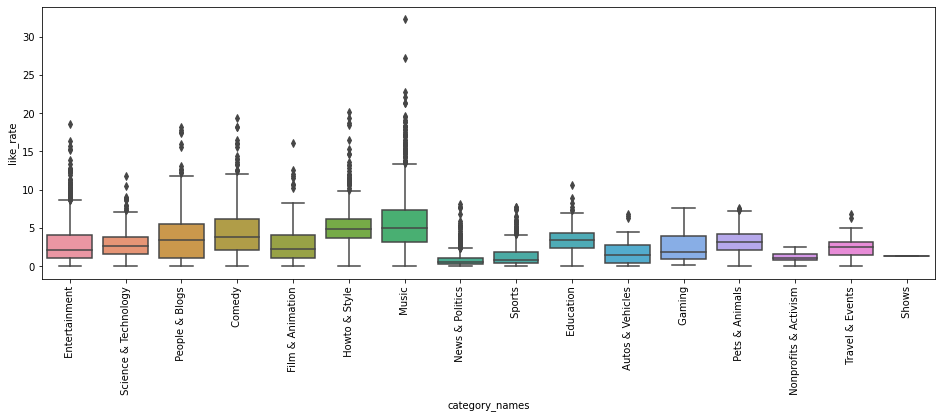

In [130]:
plt.figure(figsize=(16,5))

sns.boxplot(data=df,x='category_names',y='like_rate')
plt.xticks(rotation='vertical')

Text(0.5, 1.0, 'Regression plot for views & likes')

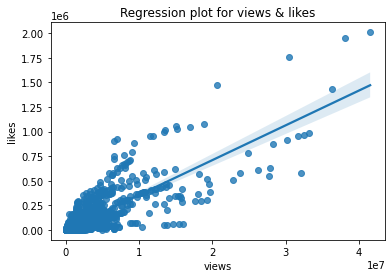

In [131]:
sns.regplot(data=df,x='views',y='likes')
plt.title('Regression plot for views & likes')

Text(0.5, 1.0, 'Regression plot for views & dislikes')

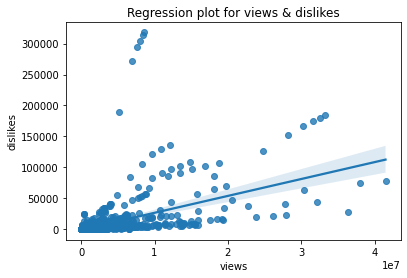

In [132]:
sns.regplot(data=df,x='views',y='dislikes')
plt.title('Regression plot for views & dislikes')

**Correlation matrix is the evidence of above analysis!**


In [134]:
df_corr=df[['views','likes','dislikes']]

In [135]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

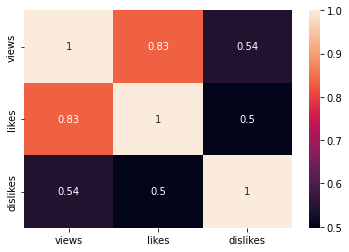

In [136]:
sns.heatmap(df_corr.corr(),annot=True)

In [137]:
df.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date         category_names  like_rate  dislike_rate  comment_rate  
0  13.09          Entertainment   7.283816      0.134979      1.052451  
1  13.09   Science & Technology   2.364506      0.339422      0.000000  
2  13.09         People & Blogs   9.863257      0.680373      2.920128  
3  13.09   Science & Technology   0.945270      0.171909      0.485560  
4  13.09                 Comedy   8.275278      0.048625      0.570656

In [139]:
df.groupby('channel_title')['video_id'].count()

channel_title
#Mind Warehouse            3
100isNow                   1
112VEVO                    1
1791L                      4
20th Century Fox          19
                          ..
МИР УДИВЛЯЕТ v2.0          2
Мегаполис                  4
Томикс-ТВ online           1
ユカイ工学                      2
영국남자 Korean Englishman    11
Name: video_id, Length: 1230, dtype: int64

In [156]:
cdf=df.groupby('channel_title')['video_id'].count().sort_values(ascending=False)

In [161]:
cdf.to_frame()


video_id
channel_title                                   
Vox                                           40
Jimmy Kimmel Live                             40
First We Feast                                39
The Tonight Show Starring Jimmy Fallon        38
TheEllenShow                                  38
...                                          ...
FifthHarmonyVEVO                               1
FOX SportsDetroit                              1
US News Channel                                1
Evelyn From The Internets                      1
Francis Dominic                                1

[1230 rows x 1 columns]

In [174]:
cdf=cdf.reset_index().rename(columns={'video_id':'totoal_videos'})

In [175]:
cdf

channel_title  totoal_videos
0                                        Vox             40
1                          Jimmy Kimmel Live             40
2                             First We Feast             39
3     The Tonight Show Starring Jimmy Fallon             38
4                               TheEllenShow             38
...                                      ...            ...
1225                        FifthHarmonyVEVO              1
1226                       FOX SportsDetroit              1
1227                         US News Channel              1
1228               Evelyn From The Internets              1
1229                         Francis Dominic              1

[1230 rows x 2 columns]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

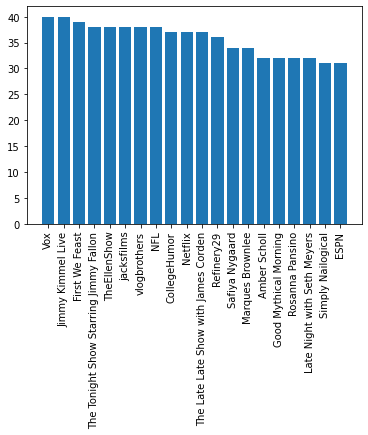

In [181]:
# plt.bar(data=cdf[0:20],x='channel_title',height='totoal_videos')
# plt.xticks(rotation='vertical')

In [182]:
import plotly.express as px


In [184]:
px.bar(data_frame=cdf[0:10],x='channel_title',y='totoal_videos')